# Facial Recognition System:

Identify faces based on the database

## Data Loading

In [1]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

Saving face_dataset.csv to face_dataset.csv
{'face_dataset.csv': b'0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,Label\r\n-2.0619872,0.5813201,-0.24911457,-0.6313401,-1.3598989,0.7516187,-0.02936425,1.610456,0.3414016,1.2867085,0.7081139,0.5328559,0.12066181,-0.23335527,-1.0446295,0.70881206,0.10293387,-0.6463789,0.07974745,0.25900617,-0.82325184,-0.0730528,1.2446698e-05,-0.88934606,0.1025452,0.42977336,0.3258744,-0.15460753,0.24904332,0.734776,-0.55726385,-0.12594886,-0.08575661,0.21918552,-0.5981821,0.6866877,-0.4542143,-0.34909734,0.4279169,-0.430

Import required libraries

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [3]:
import pandas as pd
df = pd.read_csv('face_dataset.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,Label
0,-2.061987,0.581320,-0.249115,-0.631340,-1.359899,0.751619,-0.029364,1.610456,0.341402,1.286709,...,-0.356844,-0.016488,-0.228473,0.258134,0.046834,0.135742,-0.068297,0.022038,0.090003,1
1,-0.796838,-0.667228,-0.107889,0.019755,-0.686348,0.912779,0.463412,-0.238308,-0.294023,0.215470,...,-0.037243,-0.012105,-0.351285,-0.034968,0.192314,-0.015406,-0.089117,0.023588,-0.019998,1
2,5.376779,1.142695,2.543111,-2.727212,0.272785,-0.972187,1.111221,1.645502,-2.556968,-0.648781,...,0.157441,-0.333875,-0.303720,-0.085975,0.171346,0.128577,-0.118262,0.045881,-0.190158,1
3,7.029235,1.242883,-2.628079,1.224479,-1.141370,-1.620647,0.205890,1.567561,0.736200,0.010782,...,0.051040,-0.068796,0.141841,-0.227999,0.046044,0.013643,-0.125893,0.146396,0.013320,1
4,5.484822,6.752706,-4.291114,1.740412,-1.603087,-1.075175,1.919936,-0.197615,1.030596,1.451936,...,0.034412,0.265141,0.226000,0.032064,-0.113654,0.059126,-0.216803,0.025849,0.020456,1


## Data Preprocessing

In [4]:
df.shape

(190, 151)

In [5]:
print(df.dtypes)

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
146      float64
147      float64
148      float64
149      float64
Label      int64
Length: 151, dtype: object


In [6]:
# Separate Label and Features
# Assuming the first row is not a header row to be skipped, use slicing from the beginning
X = df.iloc[1:, : -1].astype(float).values
y = df.iloc[1:, -1].astype(int).values

In [7]:
X , y

(array([[-7.9683820e-01, -6.6722834e-01, -1.0788881e-01, ...,
         -8.9116500e-02,  2.3588002e-02, -1.9998040e-02],
        [ 5.3767786e+00,  1.1426954e+00,  2.5431106e+00, ...,
         -1.1826202e-01,  4.5880660e-02, -1.9015802e-01],
        [ 7.0292350e+00,  1.2428827e+00, -2.6280790e+00, ...,
         -1.2589262e-01,  1.4639612e-01,  1.3320401e-02],
        ...,
        [ 3.1533903e-01, -4.0725074e+00, -2.8339057e+00, ...,
          1.8858203e-01, -2.4227563e-02,  5.1982203e-03],
        [-3.2667020e+00, -7.2273865e+00, -1.0956784e+00, ...,
         -5.4958580e-02, -7.6375750e-02, -2.0479502e-01],
        [ 1.0321491e+00, -5.3551836e+00,  9.8068160e-01, ...,
          1.0284077e-02, -4.7342516e-02,  2.0794148e-02]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
# Normalize features (0 to 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled

array([[0.43096817, 0.43526334, 0.45332267, ..., 0.31786854, 0.46304249,
        0.42894899],
       [0.70936128, 0.55535091, 0.67580578, ..., 0.28844141, 0.4882199 ,
        0.24759735],
       [0.78387715, 0.56199829, 0.24181762, ..., 0.28073708, 0.60174242,
        0.46445883],
       ...,
       [0.4811207 , 0.20932471, 0.22454377, ..., 0.59825027, 0.40903942,
        0.45580244],
       [0.31959212, 0.        , 0.37042318, ..., 0.3523565 , 0.35014307,
        0.23199765],
       [0.51344453, 0.12421976, 0.54468011, ..., 0.41822955, 0.38293331,
        0.47242413]])

## Exploratory Data Analysis (EDA)

/tmp/ipython-input-10-1388033235.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2', ax=axs[0, 0])


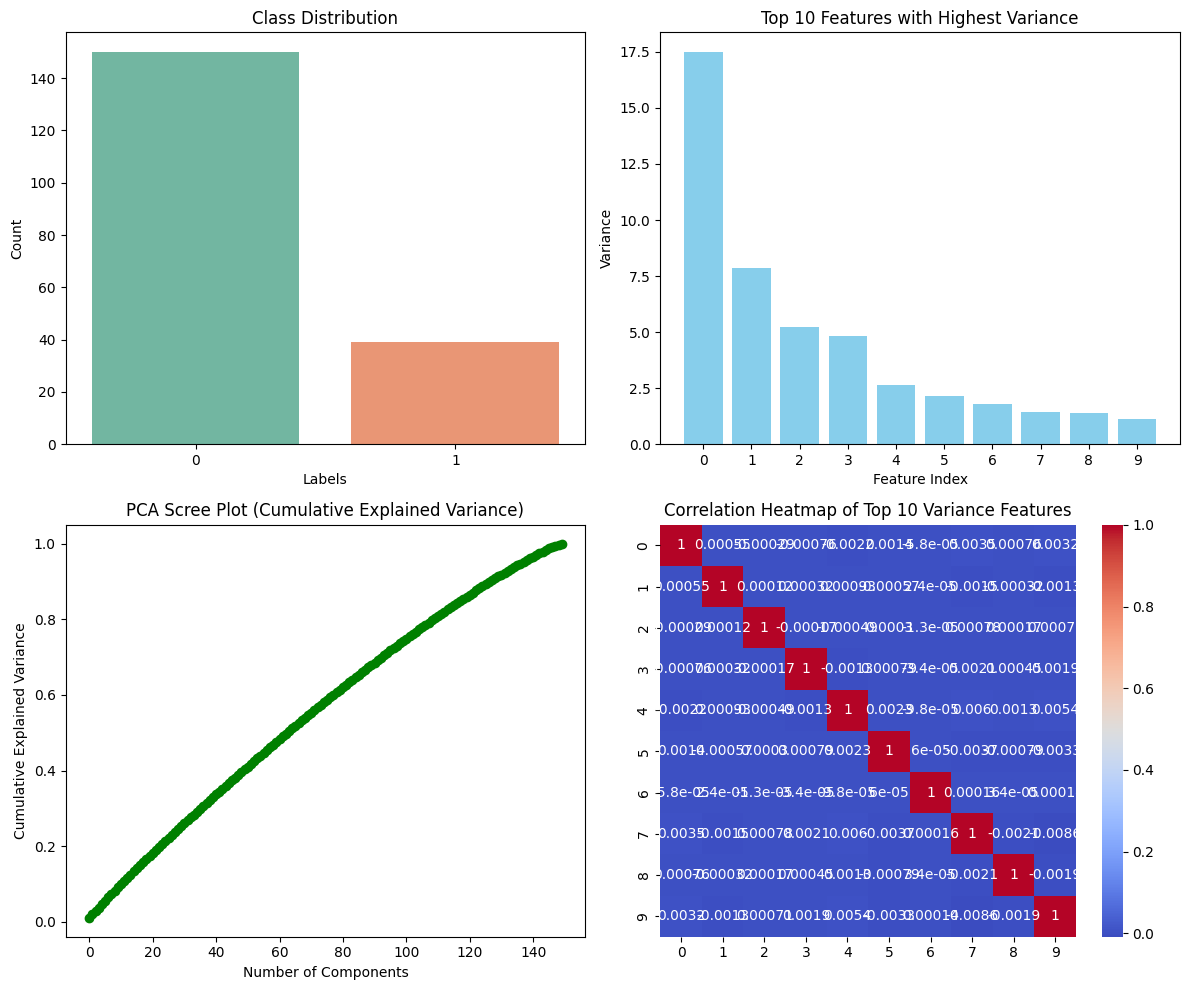

In [10]:
from sklearn.decomposition import PCA
# Find top 10 features by variance
feature_variances = pd.DataFrame(X).var()
top_variance = feature_variances.sort_values(ascending=False).head(10)
top_indices = top_variance.index.astype(int)

# Create subplot visualizations
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 1].bar(top_indices.astype(str), top_variance.values, color='skyblue')
axs[0, 1].set_title("Top 10 Features with Highest Variance")
axs[0, 1].set_xlabel("Feature Index")
axs[0, 1].set_ylabel("Variance")

# Perform PCA for scree plot
pca_full = PCA().fit(X_scaled)

# PCA Scree Plot (Cumulative Explained Variance)
axs[1, 0].plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', color='green')
axs[1, 0].set_title("PCA Scree Plot (Cumulative Explained Variance)")
axs[1, 0].set_xlabel("Number of Components")
axs[1, 0].set_ylabel("Cumulative Explained Variance")

# Class Distribution
sns.countplot(x=y, palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title("Class Distribution")
axs[0, 0].set_xlabel("Labels")
axs[0, 0].set_ylabel("Count")

# Correlation Heatmap for Top 10 Features
top_corr_features = pd.DataFrame(X).iloc[:, top_indices].corr()
sns.heatmap(top_corr_features, annot=True, cmap="coolwarm", ax=axs[1, 1])
axs[1, 1].set_title("Correlation Heatmap of Top 10 Variance Features")

plt.tight_layout()
plt.show()

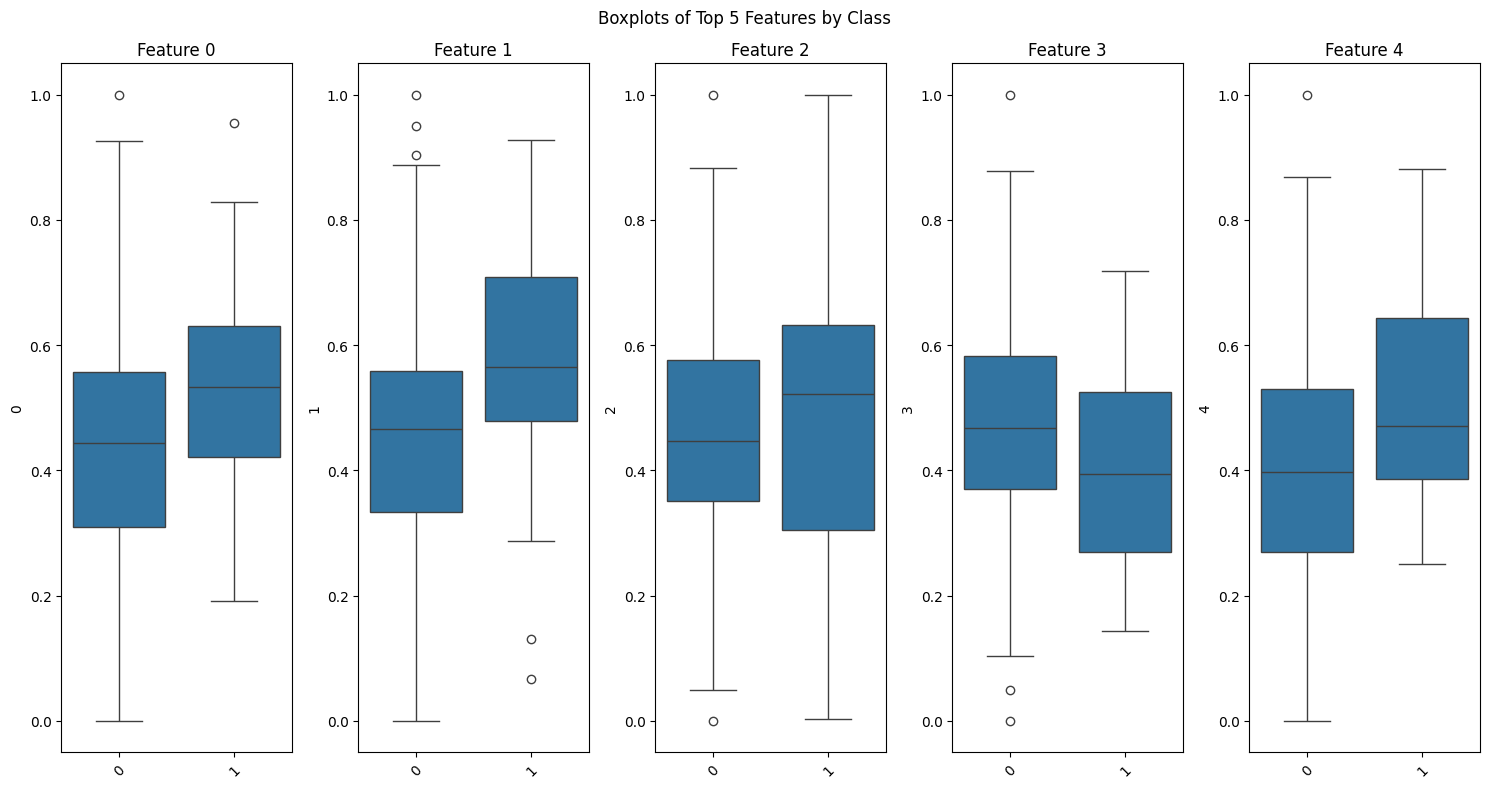

In [11]:
# Boxplots of top 5 high-variance features
plt.figure(figsize=(15, 8))
top_5_idx = top_indices[:5]
# Use X_scaled and y which have matching dimensions and exclude the header
for i, idx in enumerate(top_5_idx):
    plt.subplot(1, 5, i + 1)
    # Use X_scaled for features and y for labels
    sns.boxplot(x=y, y=pd.DataFrame(X_scaled).iloc[:, idx])
    plt.title(f'Feature {idx}')
    plt.xticks(rotation=45)
plt.suptitle("Boxplots of Top 5 Features by Class")
plt.tight_layout()
plt.show()

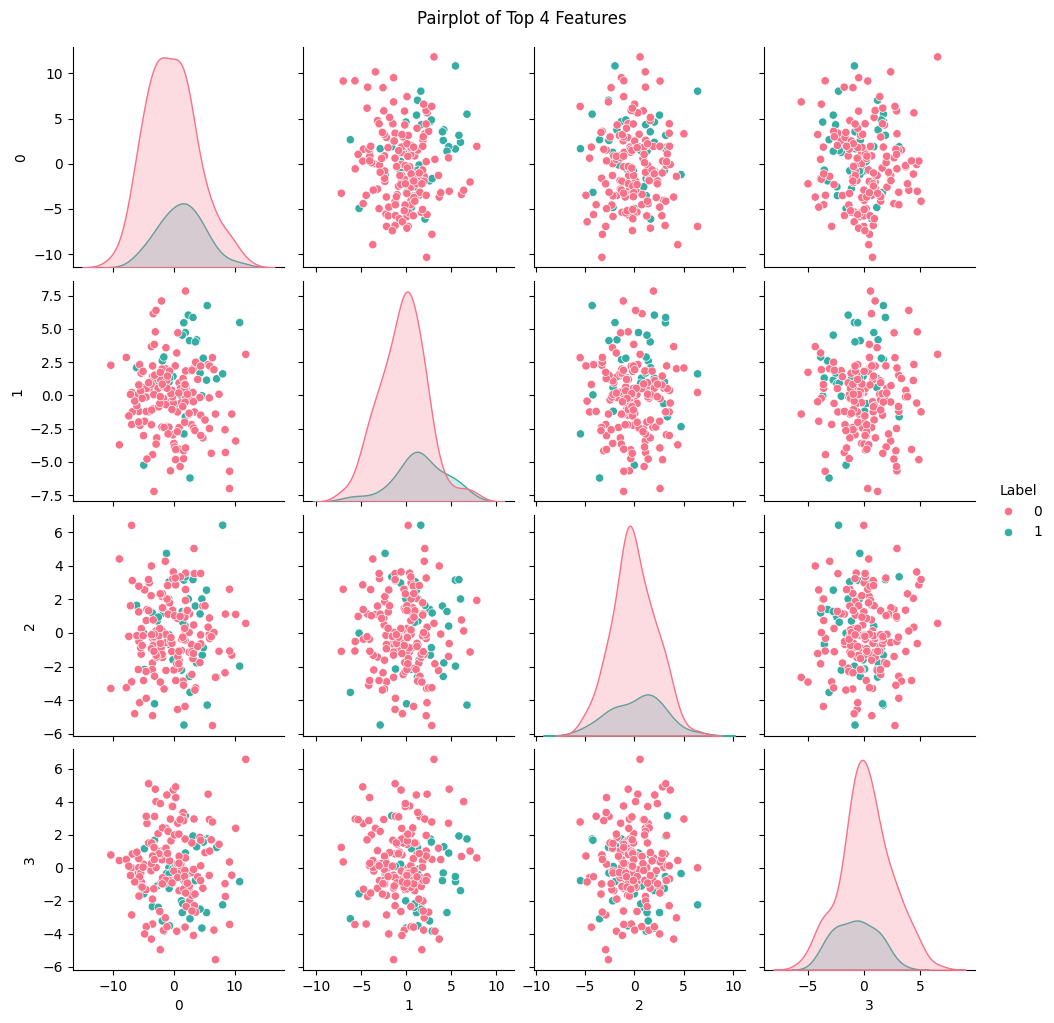

In [12]:
# Pairplot of top 4 features (only if dataset is not too large or many classes)
# Use X instead of df to ensure matching dimensions with y
top_4_features = pd.DataFrame(X).iloc[:, top_indices[:4]]
top_4_features['Label'] = y

sns.pairplot(top_4_features, hue='Label', palette='husl')
plt.suptitle("Pairplot of Top 4 Features", y=1.02)
plt.show()

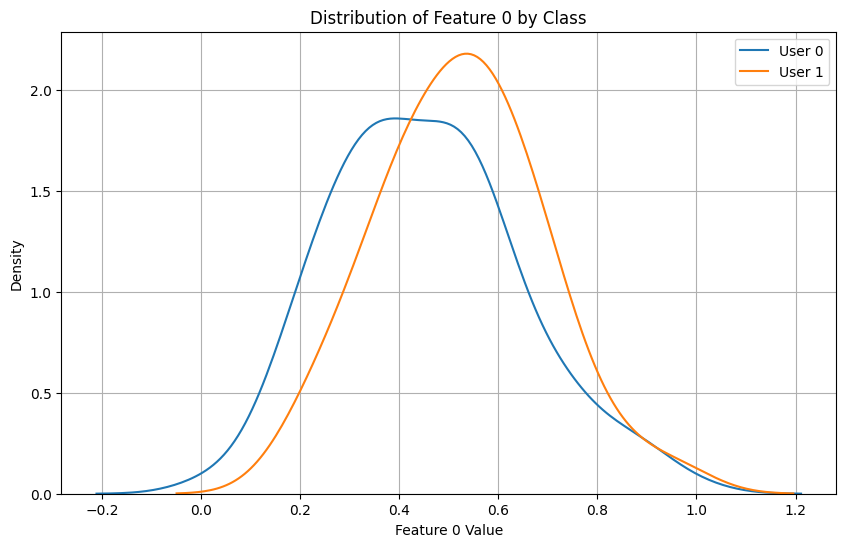

In [13]:
# 4. Distribution Plot (Histogram) of a feature per class
feature_id = top_indices[0]  # Most variant feature
plt.figure(figsize=(10, 6))
# Use np.unique(y) to get unique labels from the numpy array y
for label in np.unique(y):
    # Filter X_scaled based on the current label in y
    sns.kdeplot(pd.DataFrame(X_scaled)[y == label].iloc[:, feature_id], label=f'User {label}')
plt.title(f"Distribution of Feature {feature_id} by Class")
plt.xlabel(f"Feature {feature_id} Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check variance explained
print("Explained variance ratio by PCA components:", pca.explained_variance_ratio_)

Explained variance ratio by PCA components: [0.01037824 0.00932521]


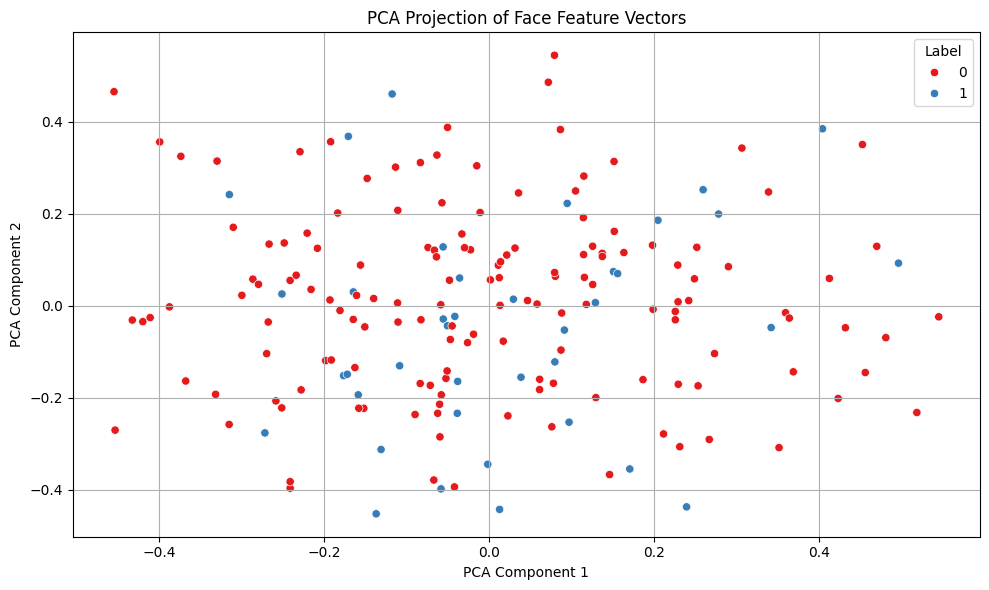

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title("PCA Projection of Face Feature Vectors")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title="Label")
plt.tight_layout()
plt.show()

## Model Traininig & Evaluation

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


🔍 KNN Results
Accuracy: 0.7632
Classification Report:


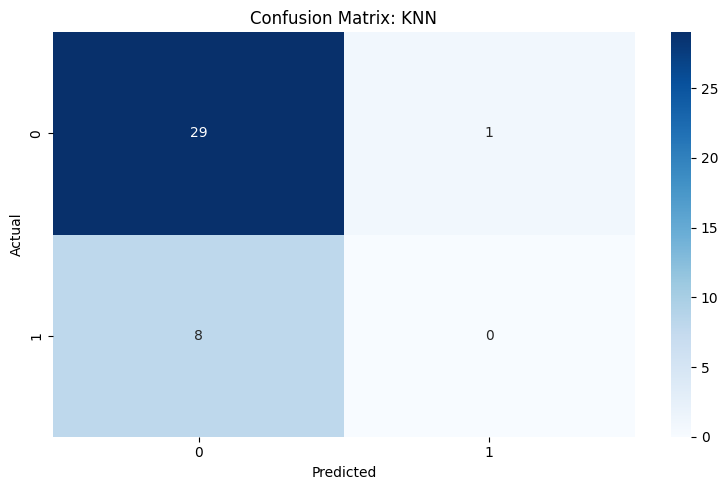


🔍 SVM Results
Accuracy: 0.7632
Classification Report:


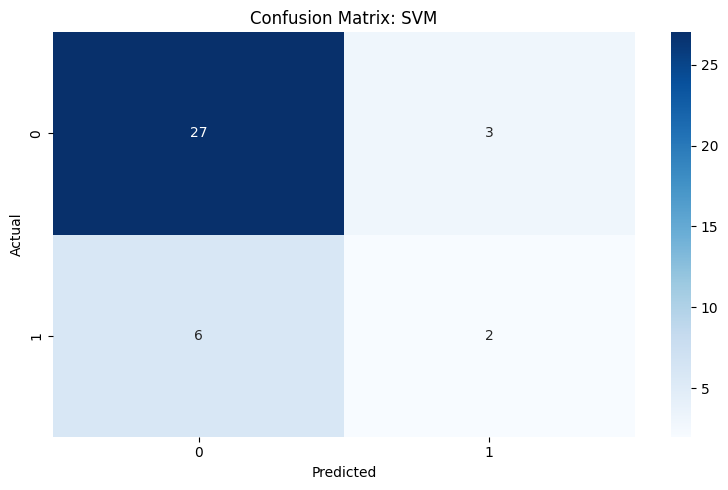


🔍 Logistic Regression Results
Accuracy: 0.7895
Classification Report:


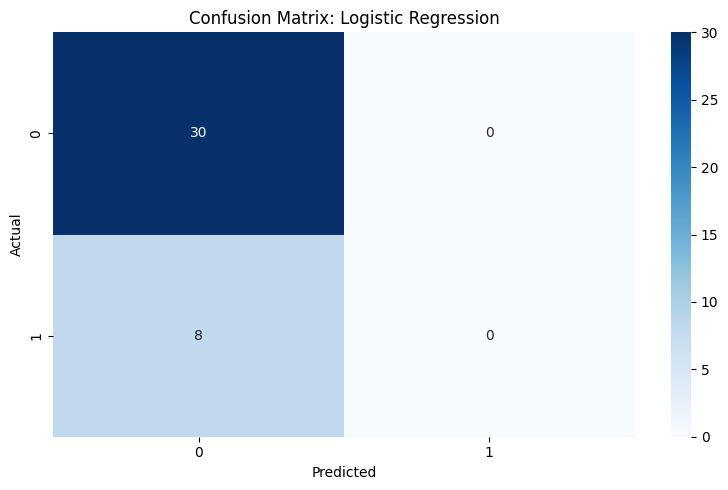


🔍 Random Forest Results
Accuracy: 0.7895
Classification Report:


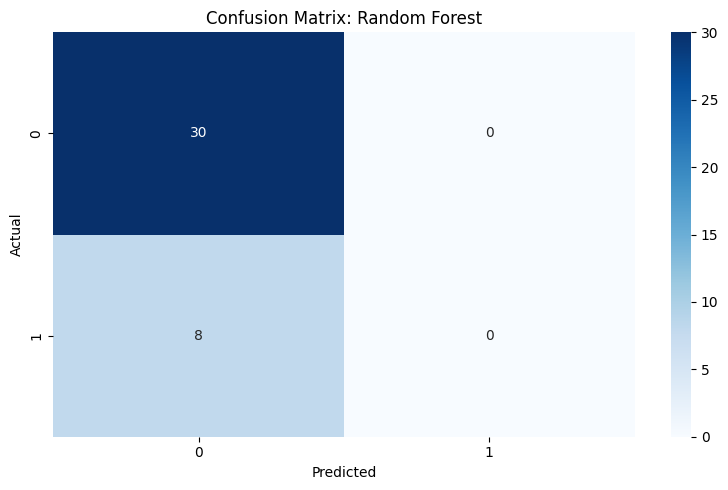

/tmp/ipython-input-19-2690046659.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[0] for x in accuracy_scores], y=[x[1] for x in accuracy_scores], palette="viridis")


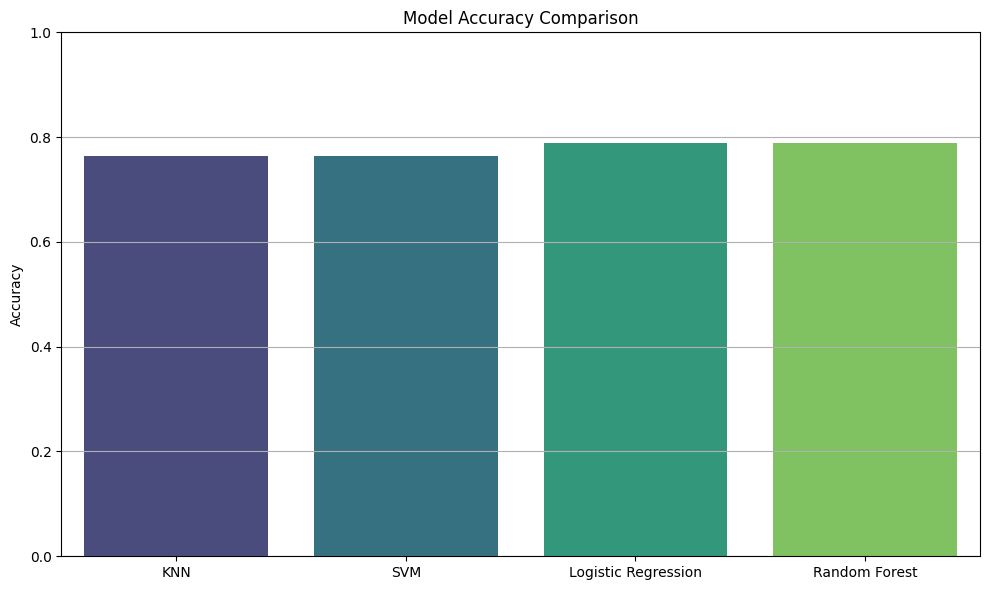

In [19]:
# Initialize models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='linear', probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store results
model_results = {}
accuracy_scores = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append((name, acc))

    print(f"\n🔍 {name} Results")
    print("Accuracy:", round(acc, 4))
    print("Classification Report:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Accuracy comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[0] for x in accuracy_scores], y=[x[1] for x in accuracy_scores], palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [20]:
# Find the best model from the accuracy_scores list
best_model_name = max(accuracy_scores, key=lambda item: item[1])[0]
best_accuracy = max(accuracy_scores, key=lambda item: item[1])[1]

print(f"\nBest traditional model: {best_model_name} with accuracy: {best_accuracy*100:.2f}%")
# Find the actual best trained model object
best_trained_model = models[best_model_name]

print(f"\nSample predictions using {best_model_name} model on first 3 test samples:")
# Make predictions on the first 3 test samples using the best model
sample_predictions = best_trained_model.predict(X_test[:3])
# Get the actual labels for the first 3 test samples
actual_labels = y_test[:3]

for i in range(len(sample_predictions)):
    print(f"Sample {i+1}: Predicted Label = {sample_predictions[i]}, Actual Label = {actual_labels[i]}")


Best traditional model: Logistic Regression with accuracy: 78.95%

Sample predictions using Logistic Regression model on first 3 test samples:
Sample 1: Predicted Label = 0, Actual Label = 0
Sample 2: Predicted Label = 0, Actual Label = 0
Sample 3: Predicted Label = 0, Actual Label = 0


## Hyper Parameter Tunning

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Choose Logistic Regression for tuning
model_lr = LogisticRegression(max_iter=1000, solver='liblinear') # Use liblinear for smaller datasets

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'penalty': ['l1', 'l2'], # Specify the norm of the penalty
    'solver': ['liblinear'] # liblinear supports both l1 and l2 penalties
}

# Instantiate GridSearchCV
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

# Fit to the training data (using the scaled training data X_train and y_train)
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_lr = grid_search_lr.best_params_
best_estimator_lr = grid_search_lr.best_estimator_

# Evaluate the best model on the test set
y_pred_lr = best_estimator_lr.predict(X_test)

# Print results
print("Best Parameters found by GridSearchCV for Logistic Regression:")
print(best_params_lr)
print("\nTest Set Evaluation with Best Logistic Regression Estimator:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Best Parameters found by GridSearchCV for Logistic Regression:
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Test Set Evaluation with Best Logistic Regression Estimator:
Accuracy: 0.7894736842105263
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        30
           1       0.50      0.12      0.20         8

    accuracy                           0.79        38
   macro avg       0.65      0.55      0.54        38
weighted avg       0.74      0.79      0.74        38



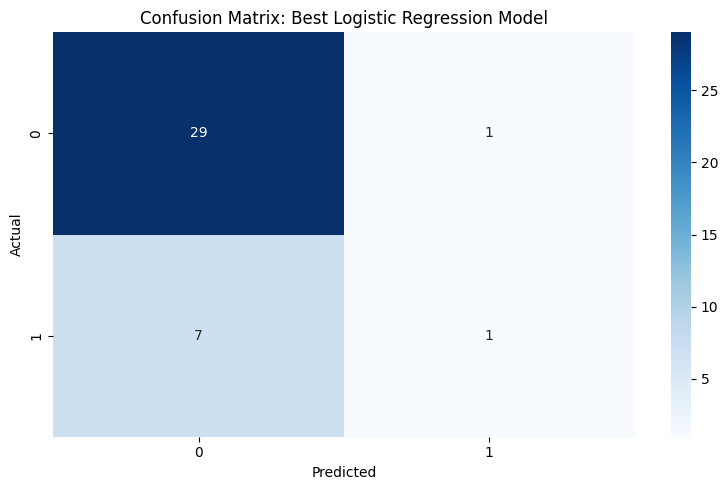

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming best_estimator_lr is the best Logistic Regression model

if 'best_estimator_lr' in globals() and 'X_test' in globals() and 'y_test' in globals():
    y_pred_lr = best_estimator_lr.predict(X_test)
    cm_lr = confusion_matrix(y_test, y_pred_lr)

    plt.figure(figsize=(8, 5))
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix: Best Logistic Regression Model")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
else:
    print("Best Logistic Regression model or test data not found. Please run the previous cells.")

## Model Prediction


In [28]:
# Predicting using the Test Dataset
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Take first 10 training samples as known users
known_vectors = X_train[:10]
known_labels = np.array(y_train[:10])  # ✅ FIXED

# Simulate a new user
new_face = X_test[0].reshape(1, -1)

# Compare using cosine similarity
similarities = cosine_similarity(new_face, known_vectors)[0]

# Best match
best_match_index = np.argmax(similarities)
best_score = similarities[best_match_index]
predicted_label = known_labels[best_match_index]

# Decision threshold
threshold = 0.85

if best_score >= threshold:
    print(f"✅ Access Granted: Matched with {predicted_label} (Similarity: {best_score:.2f})")
else:
    print(f"❌ Access Denied: No match found (Best Similarity: {best_score:.2f})")


✅ Access Granted: Matched with 0 (Similarity: 0.88)


In [30]:
# Predicting using the Test dataset and align with the best model

def predict_face_identity(face_features, trained_model):
    """
    Predicts the identity of a face based on its feature vector.

    Args:
      face_features: A numpy array representing the feature vector of the face.
      trained_model: The trained machine learning model.

    Returns:
      The predicted label (identity) of the face.
    """
    if face_features.ndim == 1:
        face_features = face_features.reshape(1, -1)
    predicted_label = trained_model.predict(face_features)
    return predicted_label[0]

if 'best_estimator_lr' in globals() and 'X_test' in globals() and 'y_test' in globals():
    # Take a sample from the test set for prediction
    sample_index = 0 # You can change this index to predict on different samples
    sample_face_features = X_test[sample_index]
    actual_label = y_test[sample_index]

    # Predict the identity using the best Logistic Regression model
    predicted_identity = predict_face_identity(sample_face_features, best_estimator_lr)

    print(f"Sample Index: {sample_index}")
    print(f"Actual Label: {actual_label}")
    print(f"Predicted Identity: {predicted_identity}")
else:
    print("Best Logistic Regression model or test data not found. Please run the previous cells.")

Sample Index: 0
Actual Label: 0
Predicted Identity: 0


In [31]:
# Use the best_trained_model which is already fitted
y_pred = best_trained_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       0.00      0.00      0.00         8

    accuracy                           0.79        38
   macro avg       0.39      0.50      0.44        38
weighted avg       0.62      0.79      0.70        38

Confusion Matrix:
[[30  0]
 [ 8  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Upload new images to test the integrated facial recognition system.

In [32]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}"')

Saving Screenshot 2025-03-20 085332.png to Screenshot 2025-03-20 085332.png
User uploaded file "Screenshot 2025-03-20 085332.png"


In [33]:
# prompt: Detect the position of the face in the image.

!pip install face_recognition

import face_recognition
from PIL import Image, ImageDraw

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("Screenshot 2025-03-20 085332.png")

# Find all the face locations in the image
face_locations = face_recognition.face_locations(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

# Create a Pillow Image object from the image
pil_image = Image.fromarray(image)
# Create a Pillow ImageDraw object so that we can draw on the image
draw = ImageDraw.Draw(pil_image)

for face_location in face_locations:
    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_face_image = Image.fromarray(face_image)
    pil_face_image.show() # Uncomment to display the detected face

    # Draw a box around the face
    draw.rectangle(((left, top), (right, bottom)), outline=(255, 0, 0), width=5)

# Display the annotated image
pil_image.show()

I found 4 face(s) in this photograph.
A face is located at pixel location Top: 268, Left: 590, Bottom: 320, Right: 642
A face is located at pixel location Top: 297, Left: 377, Bottom: 349, Right: 429
A face is located at pixel location Top: 280, Left: 158, Bottom: 331, Right: 210
A face is located at pixel location Top: 245, Left: 746, Bottom: 297, Right: 798


Saving Model for future Deployment

In [34]:
import joblib

# Save the model, scaler, and label encoder
print(joblib.dump(best_trained_model, "best_trained_model.pkl"))
print(joblib.dump(scaler, "scaler.pkl"))
# Assuming label_encoder and top_features were intended but not defined/used consistently,
# I will comment them out to avoid further NameErrors for now.
# joblib.dump(label_encoder, "label_encoder.pkl")
# joblib.dump(top_features, "top_features.pkl")

['best_trained_model.pkl']
['scaler.pkl']
